### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

Data Source: https://www.kaggle.com/datasets/farhanmd29/50-startups

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Importing the dataset
dataset = pd.read_csv("C:/Users/ravils/Almabetter/50_Startups.csv")

In [5]:
len(dataset)

50

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.shape

(50, 5)

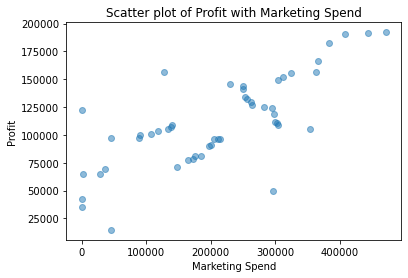

In [8]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

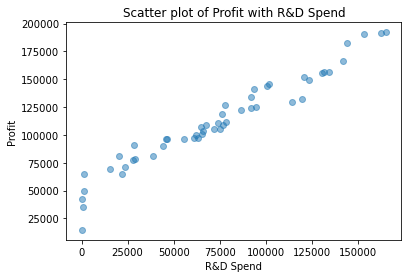

In [9]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

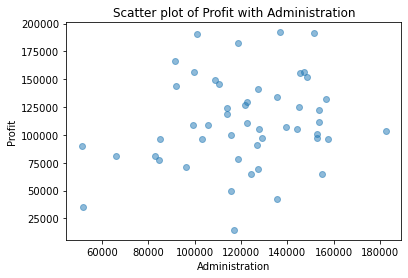

In [10]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

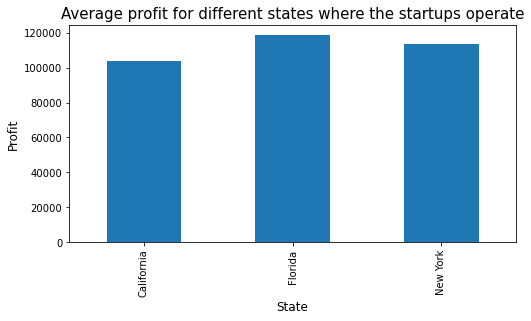

In [25]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (8,4),
    fontsize = 10
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 12)
ax.set_ylabel("Profit", fontsize = 12)

The average profit is higher in Florida as it is less expensive state than New York and California. So the operating cost is lower in Florida, hence the margin of profit would be high. 

In [26]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [27]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [28]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [30]:
dependent_variable = 'Profit'

In [31]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [32]:
independent_variables

['Florida_State',
 'Administration',
 'R&D Spend',
 'Marketing Spend',
 'NewYork_State',
 'California_State']

In [33]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [34]:
dataset[independent_variables]

,Florida_State,Administration,R&D Spend,Marketing Spend,NewYork_State,California_State
0,0,136897.80,165349.20,471784.10,1,0
1,0,151377.59,162597.70,443898.53,0,1
2,1,101145.55,153441.51,407934.54,0,0
3,0,118671.85,144372.41,383199.62,1,0
4,1,91391.77,142107.34,366168.42,0,0
5,0,99814.71,131876.90,362861.36,1,0
6,0,147198.87,134615.46,127716.82,0,1
7,1,145530.06,130298.13,323876.68,0,0
8,0,148718.95,120542.52,311613.29,1,0
9,0,108679.17,123334.88,304981.62,0,1


In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
X_train[0:10]

array([[1.0000000e+00, 1.0305749e+05, 5.5493950e+04, 2.1463481e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.5047440e+04, 4.6014020e+04, 2.0551764e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4413598e+05, 7.5328870e+04, 1.3405007e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5769392e+05, 4.6426070e+04, 2.1079767e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.1417579e+05, 9.1749160e+04, 2.9491957e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4553006e+05, 1.3029813e+05, 3.2387668e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5654742e+05, 1.1994324e+05, 2.5651292e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2415304e+05, 1.0002300e+03, 1.9039300e+03,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 5.4205000e+02, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5303206e+05,

In [54]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train[0:10]

array([[1.        , 0.48655174, 0.33561668, 0.45494286, 0.        ,
        0.        ],
       [0.        , 0.3173015 , 0.2782839 , 0.43561799, 1.        ,
        0.        ],
       [1.        , 0.87258866, 0.45557444, 0.28413435, 0.        ,
        0.        ],
       [0.        , 1.        , 0.2807759 , 0.44680961, 0.        ,
        1.        ],
       [1.        , 0.59103645, 0.55488118, 0.62511553, 0.        ,
        0.        ],
       [1.        , 0.88568959, 0.7880179 , 0.68649342, 0.        ,
        0.        ],
       [1.        , 0.98922572, 0.72539353, 0.54370828, 0.        ,
        0.        ],
       [0.        , 0.6847981 , 0.0060492 , 0.0040356 , 1.        ,
        0.        ],
       [0.        , 0.00432296, 0.00327821, 0.        , 1.        ,
        0.        ],
       [0.        , 0.95618996, 0.39676926, 0.22709197, 1.        ,
        0.        ]])

In [56]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
regressor.intercept_

44153.9546678486

In [43]:
regressor.coef_

array([-8.72645791e+02,  3.49927567e+03,  1.27892182e+05,  1.72720281e+04,
        7.86007422e+02,  8.66383692e+01])

In [44]:
y_pred_train = regressor.predict(X_train)

In [45]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [47]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [48]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [49]:
mean_squared_error(y_test, y_pred)

83502864.03257713

In [50]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [51]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794931

In [52]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [53]:
r2_score(y_test, y_pred)

0.9347068473282427